In [1]:
!pip install -qq google-play-scraper

     |████████████████████████████████| 51kB 1.7MB/s 


In [0]:
!pip install -qq -U watermark

In [4]:
%reload_ext watermark
%watermark -v -p pandas,matplotlib,seaborn,google_play_scraper

CPython 3.6.9
IPython 5.5.0

pandas 1.0.3
matplotlib 3.2.1
seaborn 0.10.1
google_play_scraper 0.0.2.6


In [0]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.4)

In [0]:
app_lists = [
  'com.dd.doordash',
  'com.grubhub.android',
  'com.ubercab.eats',
  'com.seamlessweb.android.view',
  'com.postmates.android',
  'com.main.gopuff',
  'com.ncconsulting.skipthedishes_android',
  'com.munchery.team',
  'com.buzzfeed.tasty',
  'com.trycaviar.customer'
]

In [19]:
app_infos = []

for ap in tqdm(app_lists):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)


100%|██████████| 10/10 [00:01<00:00,  6.50it/s]


In [0]:
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [20]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "5.1",
  "androidVersionText": "5.1 and up",
  "appId": "com.dd.doordash",
  "containsAds": null,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "Delivery anywhere you are. DoorDash offers the greatest selection of your favorite local and national restaurants -- more than 310,000 menus across 4,000+ cities in the U.S.,Canada and Australia. Spend more time doing the things you love -- we'll take care of the rest.\r\n\r\nYOUR FAVORITE RESTAURANTS JUST A FEW TAPS AWAY\r\nChoose from a huge variety of cuisines, from your local sushi spot to the comfort food you crave. Get your favorite meals faster with quick and easy ordering.\r\n\r\nSUBSCRIBE TO DASHPASS\r\nDashPass offers lower service fees and $0 delivery fees, with thousands of local restaurants recently added.\r\n\r\nNO-CONTACT DELIVERY \r\nDeliveries are now left at your door by default and you have the choice to select \u201cHand 

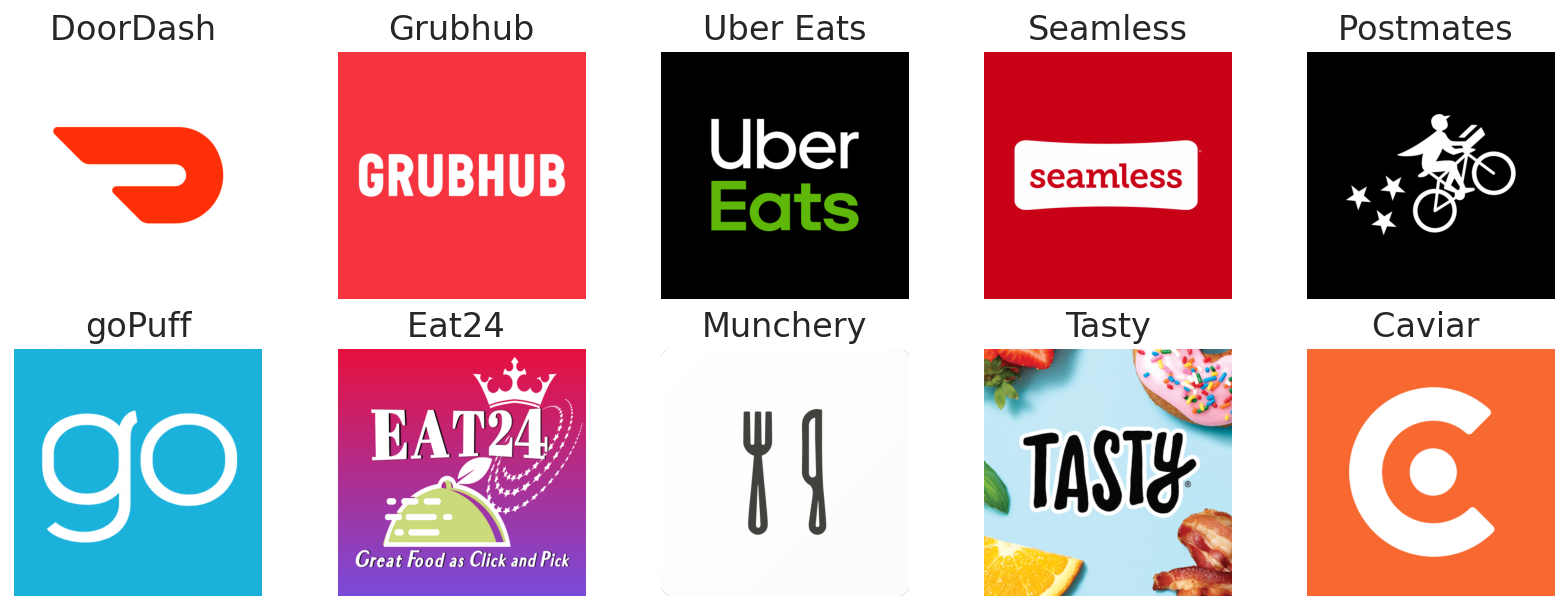

In [15]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')

In [0]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('apps.csv', index=None, header=True)

In [22]:
app_reviews = []

for ap in tqdm(app_lists):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 400 if score == 3 else 150,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)


100%|██████████| 10/10 [00:49<00:00,  4.94s/it]


In [23]:
len(app_reviews)

17832

In [0]:
app_reviews_df = pd.DataFrame(app_reviews)


In [25]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOF9hsURyAMTxPPIwn2-wiZ9w-1dKX0t39NWxUj...,Mickey Louse,https://lh3.googleusercontent.com/a-/AOh14GhQv...,Impossible to create a new account. It keeps r...,1,273,12.5.3,2020-04-25 23:34:34,None,NaT,most_relevant,com.dd.doordash
1,gp:AOqpTOFBDKMMguyXSUQkmgf3lqfRCXa1je3hAmcdGYV...,Drew Love,https://lh3.googleusercontent.com/-iqdRZkMh1Yc...,"Originally when I downloaded the app, I was pl...",1,294,12.6.2,2020-05-06 22:27:25,None,NaT,most_relevant,com.dd.doordash
2,gp:AOqpTOFLb9-EpmZe6zD-6jZt5N8X2IbJb_SvOWtSg6a...,Katherine Smith,https://lh3.googleusercontent.com/a-/AOh14Ggj7...,I wish I could give this app a zero. Who ever ...,1,122,12.5.3,2020-05-06 18:35:51,None,NaT,most_relevant,com.dd.doordash
3,gp:AOqpTOEaQahe4VCzNWiaKoGpCREs-BoKCJBVXyQ0oF1...,C4PTIVE,https://lh3.googleusercontent.com/a-/AOh14GhfL...,All of my emails were used to make an account ...,1,64,12.5.3,2020-05-07 14:54:00,None,NaT,most_relevant,com.dd.doordash
4,gp:AOqpTOHS1mjHqih9jwNbD7fk-OpUGkiziSPsL3ZR9cW...,Adrian Combs,https://lh3.googleusercontent.com/-yI2Ce3_kHFI...,Not so much app issues as company issues. Firs...,1,85,12.6.4,2020-05-17 15:58:14,None,NaT,most_relevant,com.dd.doordash


In [0]:
app_reviews_df.to_csv('food_delivery_reviews.csv', index=None, header=True)

In [0]:
from google.colab import files

files.download("food_delivery_reviews.csv")